In [81]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from math import ceil

In [82]:
train_data = pd.read_csv(r'../datasets/train_data.csv')
validation_data = pd.read_csv(r'../datasets/validation_data.csv')
test_data = pd.read_csv(r'../datasets/test_data.csv')

In [83]:
train_data.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,11/6/2021,7
1,category_4,836584,11/18/2021,16
2,category_1,370195,1/24/2022,6
3,category_2,172582,10/30/2021,5
4,category_2,1006009,10/30/2021,5


In [84]:
def string_to_date(d):
    return datetime(int(d.split('/')[2]), int(d.split('/')[0]), int(d.split('/')[1]))

In [85]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

def get_annual_week_id(date):
    return pd.Period(date).week

def get_monthly_week_id(date):
    first_day = date.replace(day=1)

    dom = date.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

In [86]:
train_data['WeekID'] = train_data['DateID'].apply(get_annual_week_id)
train_data['DateID'] = train_data['DateID'].apply(string_to_date)
train_data['MonthID'] = train_data['DateID'].apply(get_month)
train_data['Year'] = train_data['DateID'].apply(get_year)
train_data['WeekIDofMonth'] = train_data['DateID'].apply(get_monthly_week_id)

In [87]:
train_data.head()

,CategoryCode,ItemCode,DateID,DailySales,WeekID,MonthID,Year,WeekIDofMonth
0,category_2,117610,2021-11-06,7,44,11,2021,1
1,category_4,836584,2021-11-18,16,46,11,2021,3
2,category_1,370195,2022-01-24,6,4,1,2022,5
3,category_2,172582,2021-10-30,5,43,10,2021,5
4,category_2,1006009,2021-10-30,5,43,10,2021,5


In [88]:
train_data.shape

(19921, 8)

In [89]:
group_by_week = train_data.groupby(['WeekID', 'CategoryCode', 'ItemCode', 'MonthID', 'Year', 'WeekIDofMonth'])['DailySales'].sum().reset_index()

In [90]:
group_by_week.head()

,WeekID,CategoryCode,ItemCode,MonthID,Year,WeekIDofMonth,DailySales
0,1,category_1,3418,1,2022,2,83
1,1,category_1,3427,1,2022,2,66
2,1,category_1,17287,1,2022,2,21
3,1,category_1,17296,1,2022,2,621
4,1,category_1,24136,1,2022,2,31


In [91]:
group_by_week.describe()

,WeekID,ItemCode,MonthID,Year,WeekIDofMonth,DailySales
count,4278.000000,4.278000e+03,4278.000000,4278.000000,4278.000000,4278.000000
mean,33.474053,6.332211e+05,7.698691,2021.339411,2.980131,34.234923
std,19.725594,4.536411e+05,4.676653,0.473565,1.507623,69.277279
min,1.000000,3.418000e+03,1.000000,2021.000000,1.000000,1.000000
25%,5.000000,1.184132e+05,1.000000,2021.000000,2.000000,7.000000
50%,43.000000,8.588860e+05,10.000000,2021.000000,3.000000,15.000000
75%,48.000000,1.063600e+06,11.000000,2022.000000,4.000000,33.750000
max,52.000000,1.105027e+06,12.000000,2022.000000,6.000000,909.000000


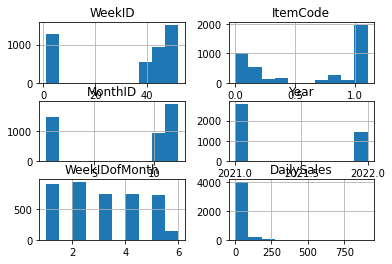

In [92]:
group_by_week.hist()
plt.show()

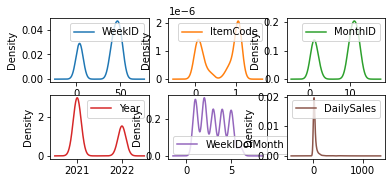

In [93]:
group_by_week.plot(kind='density', subplots=True, sharex=False, layout=(3, 3))
plt.show()

In [94]:
column_names = list(group_by_week.columns)
column_names

['WeekID',
 'CategoryCode',
 'ItemCode',
 'MonthID',
 'Year',
 'WeekIDofMonth',
 'DailySales']

[Text(0.5, 1.0, 'Correlation matrix\n')]

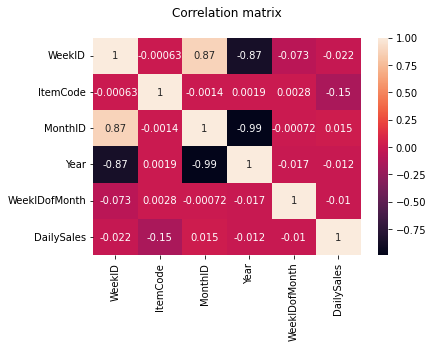

In [95]:
hm = sns.heatmap(group_by_week.corr(), annot = True)
hm.set(title = "Correlation matrix\n")

<AxesSubplot:xlabel='WeekID', ylabel='DailySales'>

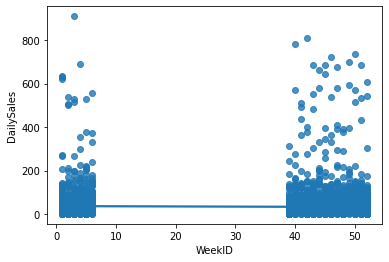

In [96]:
sns.regplot(x=group_by_week['WeekID'], y=group_by_week['DailySales'])

<AxesSubplot:xlabel='MonthID', ylabel='DailySales'>

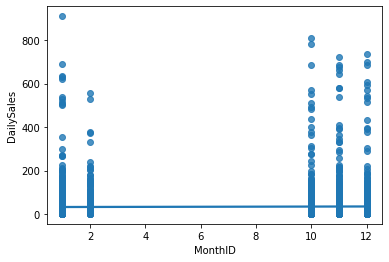

In [97]:
sns.regplot(x=group_by_week['MonthID'], y=group_by_week['DailySales'])

<AxesSubplot:xlabel='WeekIDofMonth', ylabel='DailySales'>

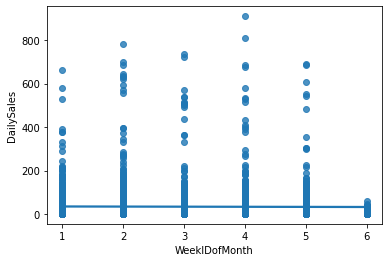

In [98]:
sns.regplot(x=group_by_week['WeekIDofMonth'], y=group_by_week['DailySales'])

In [99]:
test_data.head()

,CategoryCode,ItemCode,Week,PredictedSales
0,category_1,43738,w4,NaN
1,category_2,1006090,w1,NaN
2,category_2,1076929,w4,NaN
3,category_1,1081321,w3,NaN
4,category_2,216151,w4,NaN


In [100]:
def week_to_weekid(week):
    if (week == "w1"):
        return 3
    if (week == "w2"):
        return 4
    if (week == "w3"):
        return 1
    if (week == "w4"):
        return 2

In [101]:
weeks = np.unique(test_data['Week'].values)
dict_week_to_weekid = {}

for i in range(len(weeks)):
    dict_week_to_weekid [weeks[i]] = week_to_weekid(weeks[i])

print(dict_week_to_weekid)

{'w1': 3, 'w2': 4, 'w3': 1, 'w4': 2}


In [103]:
test_data["WeekIDofMonth"] = test_data["Week"].apply(week_to_weekid)